In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [224]:
power_data = pandas.read_csv('C1--aes--00003.csv')[1:-1]
lfsr_data = pandas.read_csv('C2--aes--00003.csv')[1:-1]
clk_data = pandas.read_csv('C3--aes--00003.csv')[1:-1]

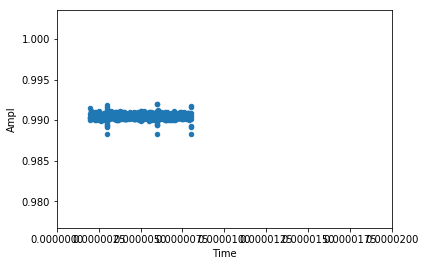

In [97]:
power_data[1000:4000].plot.scatter(x = 'Time', y = 'Ampl', xlim=[0, 2e-5])

2471   -0.141511
2472    0.228489
2473    0.158489
2474   -0.051511
2475   -0.021511
2476    0.028489
2477    0.218489
2478   -0.341511
2479   -0.161511
2480    0.128489
2481    0.188489
2482    0.048489
2483   -0.101511
2484   -0.361511
2485    0.208489
2486    0.198489
2487    0.138489
2488    0.068489
2489    0.098489
2490   -0.051511
2491   -0.141511
2492   -0.441511
2493   -0.051511
2494    0.128489
2495   -0.041511
2496   -0.031511
2497    0.288489
2498    0.868489
2499   -0.671511
2500   -0.311511
2501    0.478489
2502   -0.311511
2503    0.878489
2504    0.558489
2505   -0.651511
2506   -0.091511
2507   -0.341511
2508   -0.411511
2509    0.358489
2510    0.548489
2511    0.558489
2512    0.188489
2513   -0.361511
2514   -0.441511
2515    0.148489
2516    0.098489
2517    0.218489
2518    0.088489
2519    0.298489
2520    0.418489
2521    0.108489
2522   -0.351511
2523    0.008489
2524    0.178489
2525   -0.231511
2526   -0.301511
2527    0.198489
2528    0.048489
2529    0.0084

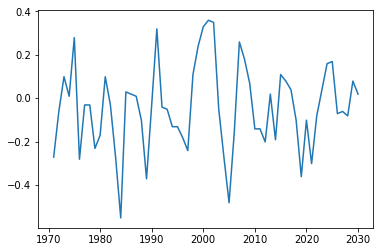

In [225]:
mu = np.mean(power_data['Ampl'])
power_data_norm = (power_data['Ampl'] - mu)*1000
print(power_data_norm[2470:2530])
plt.plot(power_data_norm[1970:2030])

In [226]:
sz = len(clk_data)
clk_sz = 500
window = 10
power = np.zeros(int(sz/clk_sz))
lfsr = np.zeros(int(sz/clk_sz))
for i in range(0, int(sz/clk_sz)):
    power_samples = power_data_norm[clk_sz*(i+1) - window: clk_sz*(i+1) + window]
    diff = np.max(power_samples) - np.mean(power_samples)
    if (diff > 0.5):
        power[i] = 1
    else:
        power[i] = 0
    lfsr[i] = np.mean(lfsr_data['Ampl'][i*clk_sz: (i+1)*clk_sz])
    if (2.5 - lfsr[i] < lfsr[i]):
        lfsr[i] = 1
    else:
        lfsr[i] = 0
print(lfsr[:50])
print(power[:50])
print((power - lfsr)[:50])
print(len(np.where(power - lfsr != 0)[0]))
#plt.plot(np.arange(0, int(sz/clk_sz)), lfsr)
#plt.plot(np.arange(0, int(sz/clk_sz)), power)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0.]
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
77


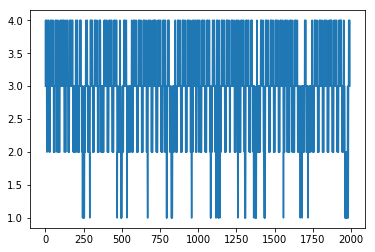

In [227]:
l = []
key = []
for j in range(4):
    best_key = []
    best_key_count = 0
    for i in range(1<<8):
        bits = format(i, '08b')
        bits = [int(b) for b in list(bits)]
        seq = np.array(key + bits)
        #print(seq)
        seq_temp = (seq - 0.5)*2
        power_temp = (power - 0.5)*2
        res = np.correlate(seq_temp, power_temp)
        count = len(np.where(res == max(res))[0])
        if (max(res) == len(seq)) and count > best_key_count:
            best_key = bits
            best_key_count = count
        l.append(max(res))
        #plt.plot(np.arange(len(res)), res)
    key = key + (best_key)
#plt.plot(np.arange(len(l)), l)
print(key)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]


In [136]:
print(int('de', base=16), int('ad', base=16), int('be', base=16), int('ef', base=16))

222 173 190 239


In [206]:
a = [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
a = [str(i) for i in a]

In [220]:
b = bin(int('deadbeef', base=16))[2:]

In [221]:
c = ""
c.join(a)
print(c)
print(b)


11011110101011011011111011101111


In [222]:
"".join(a)

'11101111010101101101111101110111'

In [223]:
b

'11011110101011011011111011101111'

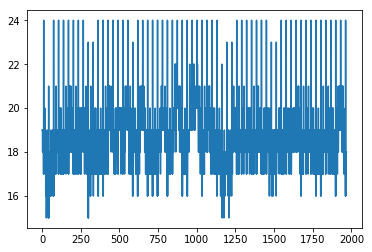

In [228]:
seq = np.array(key)

res = np.correlate(seq, power)
plt.plot(np.arange(len(res)), res)

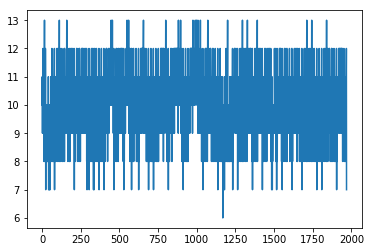

In [231]:
i = int('12345678', base=16)
bits = format(i, '032b')
bits = [int(b) for b in list(bits)]
seq = np.array(bits)
res = np.correlate(seq, power)
plt.plot(np.arange(len(res)), res)

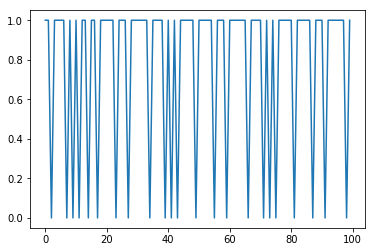

In [233]:
plt.plot(np.arange(100), power[200:300])

(0.98, 1)

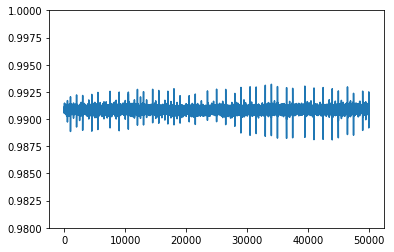

In [242]:
plt.plot(np.arange(500*100), power_data['Ampl'][500*100: 500*200])
plt.ylim((0.98, 1))